#### [詳解ディープラーニング　TensorFlow・Kerasによる時系列データ処理](https://book.mynavi.jp/ec/products/detail/id=72995)
　巣籠悠輔 著  
  
support site : [https://book.mynavi.jp/supportsite/detail/9784839962517.html](https://book.mynavi.jp/supportsite/detail/9784839962517.html)  
github : [yusugomori/deeplearning-tensorflow-keras](https://github.com/yusugomori/deeplearning-tensorflow-keras) 


### （３章　続き）

#### 多層パーセプトロン
XORゲートをパーセプトロンによって再現することを考える。  
パーセプトロンの入出力は次の通り。

$x_{1}$|$x_{2}$|y
-:-|-:-|-:-
0|0|0
0|1|1
1|0|1
1|1|0

これは線形分離不可能であり、一層パーセプトロンでは再現できない。  
例として、次のように分類を試みると失敗する。  

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

np.random.seed(0)

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0],[1],[1],[0]])

model = Sequential([
    #Dense(input_dim=2, output_dim=1),
    Dense(units=1, input_dim=2), # keras v2.0へのアップデートに伴う変更
    Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
model.fit(X,Y, epochs=200, batch_size=1)

prob = model.predict_proba(X, batch_size=1)
print(prob)

Epoch 1/200
4/4 [==============================] - 0s - loss: 0.8427     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.8205     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.8049     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.7924     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.7822     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.7754     
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.7688     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.7622     
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.7578     
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.7555     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.7520     
Epoch 12/200
4/4 [==============================] - 0s - loss: 0.7497     
Epoch 13/200
4/4 [==============================] - 0s - loss: 0.7468     
Epoch 14/200
4/4 [================

パーセプトロンの多層化によりXORゲートを実現することを考える。  
XORゲートの入出力表は次の通り。
  
$x_{1}$|$x_{2}$||$y$
-:-|-:-||-:-
0|0||0
0|1||1
1|0||1
1|1||0

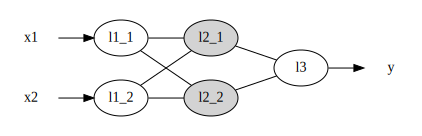

In [1]:
from graphviz import Digraph

dot = Digraph()
dot.node_attr['arrowhead']='none'
dot.graph_attr['rankdir']='LR'

with dot.subgraph(name='cluster_0', graph_attr={'style': 'invis'}) as c0:
    c0.node('x1','x1', shape='plaintext')
    c0.edge('x1', 'l1_1')
    c0.node('l2_1', 'l2_1', style='filled')
    c0.edge('l1_1', 'l2_1', arrowhead='none')
    
with dot.subgraph(name='cluster_1', graph_attr={'style': 'invis'}) as c1:
    c1.node('x2','x2', shape='plaintext')
    c1.edge('x2', 'l1_2')
    c1.node('l2_2', 'l2_2', style='filled')
    c1.edge('l1_2', 'l2_2', arrowhead='none')

dot.edge('l1_1','l2_2', arrowhead='none')
dot.edge('l1_2','l2_1', arrowhead='none')
dot.edge('l2_1','l3', arrowhead='none')
dot.edge('l2_2','l3', arrowhead='none')
dot.node('y','y', shape='plaintext')
dot.edge('l3','y')

dot.body.append('{rank=min; x1; x2;}')
dot


１層パーセプトロンに上記のような隠れ層（図中では灰色のノードが属する）を追加し、  
入力 $X=(x_{1}, x_{2})^{\mathrm{T}}$ に対して以下の式により出力 $y$ を返す。  
  
\begin{align*}
h_{1} &= f(w_{11}x_{1} +w_{12}x_{2} + b_{1}) \\
h_{2} &= f(w_{21}x_{1} +w_{22}x_{2} + b_{2}) \\
y &= f(v_{1}h_{1} + v_{2}h_{2} + c)
\end{align*}

ここで $f()$ はステップ関数、  
$V=(v_{1}, v_{2})^{\mathrm{T}}, \, c$ は隠れ層から出力層への重みベクトルおよびバイアスである。    
  
このとき、例えば以下のようなパラメータはXORゲートとして正しい出力を与える。  

\begin{align*}
W&=\left( \begin{array}{cc}
w_{11}& w_{12}\\
w_{21}& w_{22}
\end{array}
\right) = \left( \begin{array}{cc}
2& 2\\
-2& -2
\end{array} \right) \\
b&=\left( \begin{array}{c}
b_{1}\\
b_{2}
\end{array}
\right) = \left( \begin{array}{c}
-1\\
3
\end{array}
\right) \\
V&=\left( \begin{array}{c}
v_{1}\\
v_{2}
\end{array}
\right) = \left( \begin{array}{c}
2\\
2
\end{array}
\right) \\
c &= -3
\end{align*}

$x_{1}$ | $x_{2}$ | $h_{1}$ | $h_{2}$ | $v_{1}h_{1} + v_{2}h_{2}+c$ || $y$
-:-|-:-|-:-|-:-|-:-||-:-
0|0|-1|1|-3||-1
0|1|1|1|1||1
1|0|1|1|1||1
1|1|1|-1|-3||-1


#### モデル化

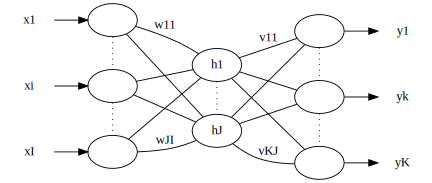

In [8]:
from graphviz import Digraph

dot = Digraph()
dot.graph_attr['rankdir']='LR'
dot.graph_attr['size']="6,6"

with dot.subgraph(name='b_0_0') as c00:
    c00.node('x1', 'x1', shape='plaintext')
    c00.node('l11', '')
    c00.edge('x1', 'l11')
    c00.node('l21', '')
    c00.node('y1', 'y1', shape='plaintext')
    c00.edge('l21', 'y1')
with dot.subgraph(name='b_0_1') as c01:
    c01.node('xi', 'xi', shape='plaintext')
    c01.node('l1i', '')
    c01.edge('xi', 'l1i')
    c01.node('l2k', '')
    c01.node('yk', 'yk', shape='plaintext')
    c01.edge('l2k', 'yk')
with dot.subgraph(name='b_0_2') as c02:
    c02.node('xI', 'xI', shape='plaintext')
    c02.node('l1I', '')
    c02.edge('xI', 'l1I')
    c02.node('l2K', '')
    c02.node('yK', 'yK', shape='plaintext')
    c02.edge('l2K', 'yK')
with dot.subgraph(name='b_1_0') as c10:
    c10.node('h1', 'h1')
    c10.node('hJ', 'hJ')
    
    
dot.edge('l11', 'h1', arrowhead='none', label='w11')
dot.edge('l1i', 'h1', arrowhead='none')
dot.edge('l1I', 'h1', arrowhead='none')
dot.edge('l11', 'hJ', arrowhead='none')
dot.edge('l1i', 'hJ', arrowhead='none')
dot.edge('l1I', 'hJ', arrowhead='none', label='wJI')

dot.edge('h1', 'l21', arrowhead='none', label='v11')
dot.edge('h1', 'l2k', arrowhead='none')
dot.edge('h1', 'l2K', arrowhead='none')
dot.edge('hJ', 'l21', arrowhead='none')
dot.edge('hJ', 'l2k', arrowhead='none')
dot.edge('hJ', 'l2K', arrowhead='none', label='vKJ')
    
dot.edge('l11', 'l1i', style='dotted', arrowhead='none')
dot.edge('l1i', 'l1I', style='dotted', arrowhead='none')
dot.edge('h1', 'hJ', style='dotted', arrowhead='none')
dot.edge('l21', 'l2k', style='dotted', arrowhead='none')
dot.edge('l2k', 'l2K', style='dotted', arrowhead='none')

dot.body.append('{rank=min; x1; xi; xI;}')
dot.body.append('{rank=same; l11; l1i; l1I;}')
dot.body.append('{rank=same; h1; hJ;}')
dot.body.append('{rank=same; l21; l2k; l2K;}')
dot.body.append('{rank=max; y1; yk; yK;}')
    
dot

入力 $X = (x_{1}, \dots, x_{I})^{\mathrm{T}}$ を受ける３層パーセプトロンについて考える。  
　（層の数え方は書籍の記述に従っている）  

隠れ層における出力 $H = (h_{1}, \dots, h_{J})^{\mathrm{T}}$ は、  
重み $W$ 、バイアス $B = (b_{1}, \dots, b_{J})^{\mathrm{T}}$ 、活性化関数 $f$ に対し　　

\begin{align*}
H = f(WX + B)
\end{align*}

と書ける。同様にして、出力層における出力 $Y = (y_{1}, \dots, y_{K})^{\mathrm{T}})$ は、  
重み $V$ 、バイアス $C = (c_{1}, \dots, c_{K})$ 、活性化関数 $g$ に対し    

\begin{align*}
Y = g(WH + C)
\end{align*}

と書くことができる。  

---
勾配降下法を適用するため、各パラメータに対する勾配を求める。

データセットのうちn番目のデータによって求めた誤差を $E_{n}$ とする。
各層の活性化前の値をそれぞれ

\begin{align*}
p := WX + B \\
q := VH + C
\end{align*}

とおく。  
$W = (w_{1}, \dots, w_{J})^{\mathrm{T}}$ および $V = (v_{1}, \dots, v_{K})^{\mathrm{T}}$ に対して  

\begin{align*}
\begin{cases}
\frac{\partial E_{n}}{\partial w_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}\frac{\partial p_{j}}{\partial w_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}X \\
\frac{\partial E_{n}}{\partial B_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}\frac{\partial p_{j}}{\partial B_{j}} &= \frac{\partial E_{n}}{\partial p_{j}}
\end{cases} \\
 \\
\begin{cases}
\frac{\partial E_{n}}{\partial v_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}\frac{\partial q_{k}}{\partial v_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}H \\
\frac{\partial E_{n}}{\partial C_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}\frac{\partial q_{k}}{\partial C_{k}} &= \frac{\partial E_{n}}{\partial q_{k}}
\end{cases}
\end{align*}

となるから、$\frac{\partial E_{n}}{\partial p_{j}}$ および $\frac{\partial E_{n}}{\partial q_{k}}$ がわかれば十分である。

さて、先ほどの多クラスロジスティック回帰と同様に  
隠れ層->出力層の伝播にソフトマックス関数を使うならば、  

\begin{align*}
\frac{\partial E_{n}}{\partial q_{k}} = -(t_{k} - y_{k})
\end{align*}

が得られる。
$ \frac{\partial E_{n}}{\partial p_{j}} $ について偏微分の連鎖率を用いて、

\begin{align*}
\frac{\partial E_{n}}{\partial p_{j}} &= \sum_{k=1}^{K}\frac{\partial E_{n}}{\partial q_{k}}\frac{\partial q_{k}}{\partial p_{j}} \\
&= \sum_{k=1}^{K}\frac{\partial E_{n}}{\partial q_{k}} \left( f^{\prime}(p_{j})v_{kj} \right)
\end{align*}

となる。

---
>以下の節は、  
[誤差逆伝播法のノート](https://qiita.com/Ugo-Nama/items/04814a13c9ea84978a4c)、および  
Michael Nielsen著 [「ニューラルネットワークと深層学習」　Chapter 2](http://nnadl-ja.github.io/nnadl_site_ja/chap2.html)を参照した。  
表記は一部を除き文献に合わせた。

いま、L層パーセプトロンについて一般化し、  
第$l$層が前の層から入力 $a^{l-1}$ を受けて出力 $a^{l}$ を次の層に送るとする。  
  
第$l-1$層$k$番目のニューロンから第$l$層$j$番目のニューロンへの接続の重みを $w^{l}_{jk}$ と表記し、  
第$l$層$j$番目のニューロンのバイアスを $b^{l}_{j}$、活性を $a^{l}_{j}$ とする。  
活性化関数が $f$ であるとき、

\begin{align*}
a^{l}_{j} = f \left( \sum_{k} w^{l}_{jk} a^{l-1}_{k} + b^{l}_{j} \right)
\end{align*}

となる。この式を行列で書き直すため、各層に対し  

\begin{align*}
&\text{重み行列} & w^{l} | w^{l}(j,k) = w^{l}_{jk} \\
&\text{バイアスベクトル} &　b^{l} = (b^{l}_{1}, \dots, b^{l}_{j}, \dots) \\
&\text{活性ベクトル} & a^{l} = (a^{l}_{1}, \dots, a^{l}_{j}, \dots)
&\end{align*}

と定義すると、次のように書き直すことができる。

\begin{align*}
a^{l} = f(w^{l}a^{l-1} + b^{l})
\end{align*}

また、活性化関数への代入値を重み付き入力と呼び、

\begin{align*}
z^{l} = w^{l}a^{l-1} + b^{l} = \sum_{k} w^{l}_{jk} a^{l-1}_{k} + b^{l}_{j}
\end{align*}

とする。

誤差関数の値をCとする。  
（例えばj番目の入力に対する正解が $t_{j}$ 、二乗誤差関数を用いるとき  
$C = \frac{1}{2}||t-a^{L}||^{2} = \frac{1}{2}\sum_{j}(t_{j} - a^{L}_{j})^{2}$ である）  
  
第l層j番目のニューロンの重み付き入力に小さな変更 $ \Delta z^{l}_{j}$ を加えると  
ニューロンの出力は $f(z^{l}_{j} + \Delta z^{l}_{j})$ となり、  
全体のコスト関数の値は $\frac{\partial C}{\partial z^{l}_{j}} \Delta z^{l}_{j}$ だけ変化する。  
 $ \Delta z^{l}_{j}$ を適切に選んで誤差関数の値を改善することを考える。  
  
ここで、第l層j番目のニューロンの誤差 $\delta^{l}_{j}$ を次のように定義する。

\begin{align*}
\delta^{l}_{j} := \frac{\partial C}{\partial z^{l}_{j}}
\end{align*}

出力層での誤差 $\delta^{L}$ の各要素は次の通り。

\begin{align*}
\delta^{L}_{j} = \frac{\partial C}{\partial a^{L}_{j}}f^{\prime}(z^{L}_{j})
\end{align*}

これを行列として表記するとき、アダマール積を $\odot$ で表して

\begin{align*}
\delta^{L} = \nabla_{a}C \odot f^{\prime}(z^{L})
\end{align*}

ただし $\nabla_{a} C$ は偏微分 $\frac{\partial L}{\partial a^{L}_{j}}$ を並べたベクトルである。  
  
誤差 $\delta^{l}$ と $\delta^{l+1}$ の関係は次のように表せる。  

\begin{align*}
\delta^{l} = ((w^{l+1})^{\mathrm{T}} \delta^{l+1}) \odot f^{\prime}(z^{l})
\end{align*}

これらの式を逐次適用し $\delta^{L-1}, \delta^{L-2}, \dots$ と求めることで、任意の層lでの誤差 $\delta^{l}$ を求めることができる。  
（本式が誤差を逆方向に伝播させているように見えることが、誤差逆伝播法の名前の由来とされている）  
  
バイアスについては

\begin{align*}
\frac{\partial C}{\partial b^{l}_{j}} = \delta^{l}_{j}
\end{align*}

すなわち

\begin{align*}
\frac{\partial C}{\partial b} = \delta
\end{align*}

と書くことができる。
  
重みについては

\begin{align*}
\frac{\partial C}{\partial w^{l}_{jk}} = a^{l-1}_{k} \delta^{l}_{j}
\end{align*}

であり、

\begin{align*}
\frac{\partial C}{\partial w} = a_{in} \delta_{out}
\end{align*}

と書き直すことができる。  

以上を用いて、逆伝播のアルゴリズムは次のようになる。
>1.input  
　入力層に対応する活性 $a^{1}$ をセットする  
>2.Feedforward  
　各 $l=2,3,\dots,L$ に対し、$z^{l} = w^{l}a^{l-1} + b^{l}$ と $a^{l} = f(z^{l})$ を計算する  
>3.Output error $\delta^{L}$  
　誤差ベクトル $\delta^{L} = \nabla_{a}C \odot f^{\prime}(z^{L})$ を計算する  
>4.Backpropagate the error  
　各 $l=L-1, L-2, \dots, 2$ に対し、$\delta^{l} = ((w^{l+1})^{\mathrm{T}} \delta^{l+1}) \odot f^{\prime}(z^{l})$ を計算する  
>5.output  
　誤差関数の勾配は $\frac{\partial C}{\partial w^{l}_{jk}} = a^{l-1}_{k} \delta^{l}_{j}$ と $\frac{\partial C}{\partial b^{l}_{j}} = \delta^{l}_{j}$ で得られる  

このアルゴリズムをミニバッチ学習に対する勾配降下法の適用する手順は次の通り。
>1.Input a set of training examples  
  
>2.For each training example x:   
　対応する活性 $a^{x,l}$ をセットし、以下のステップを行う  
　・Feedforward  
　　　$l=2,3,\dots,L$ に対し、$z^{x,l} = w^{l}a^{x,l-1}+b^{l}$ と $ a^{x,l}=f(z^{x,l})$ を計算する  
　・Output error \delta^{x,L}  
　　　誤差ベクトル $\delta^{x,L} = \nabla_{a}C_{x} \odot f^{\prime}(z^{x,L})$ を計算する  
　・Backpropagate the error  
　　　$l=L-1, L-2, \dots, 2$ に対し、$\delta^{x,l} = ((w^{l+1})^{\mathrm{T}} \delta^{x,l+1}) \odot f^{\prime}(z^{x,l})$ を計算する  
>3.Gradient descent  
　$l=L, L-1, \dots, 2$ に対し、重みとバイアスを  
　$w^{l} \rightarrow w^{l} - \frac{\eta}{m}\sum_{x} \delta^{x,l} (a^{x,l-1})^{\mathrm{T}}$   
　$b^{l} \rightarrow b^{l} - \frac{\eta}{m}\sum_{x} \delta^{x,l}$  
　で更新する  

---
#### TensorFlowによる実装

In [6]:
import numpy as np
import tensorflow as tf

# dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

x = tf.placeholder(tf.float32, shape=[None,2])
t = tf.placeholder(tf.float32, shape=[None,1])
W = tf.Variable(tf.truncated_normal([2,2]))
b = tf.Variable(tf.zeros([2]))
h = tf.nn.sigmoid(tf.matmul(x,W)+b)
V = tf.Variable(tf.truncated_normal([2,1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h,V)+c)

cross_entropy = -tf.reduce_sum(t*tf.log(y) + (1-t)*tf.log(1-y))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y,0.5)),t)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(4000):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })
    if epoch % 1000 ==0:
        print('epoch:{}'.format(epoch))
        
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
prob = y.eval(session=sess, feed_dict={
    x: X
})

print('\nclassified: \n {} \n'.format(classified))
print('output probability: {}'.format(prob))

epoch:0
epoch:1000
epoch:2000
epoch:3000

classified: 
 [[ True]
 [ True]
 [ True]
 [ True]] 

output probability: [[ 0.00645459]
 [ 0.99288309]
 [ 0.99286485]
 [ 0.01096012]]


#### Kerasによる実装

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

model.fit(X, Y, epochs=4000, batch_size=4, verbose=0) # github上だと表示が長くなり過ぎるので

classes = model.predict_classes(X, batch_size=4)
prob = model.predict_proba(X, batch_size=4)

print('\nclassified: \n {} \n'.format(Y==classes))
print('output probability: {}'.format(prob))

4/4 [==============================] - 0s

classified: 
 [[ True]
 [ True]
 [ True]
 [ True]] 

output probability: [[ 0.05957565]
 [ 0.9512738 ]
 [ 0.91689676]
 [ 0.04917862]]


functional API でも書いてみる

In [4]:
import numpy as np
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD

# dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

inputs = Input(shape=(2,))

x = Dense(2, activation='sigmoid')(inputs)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=SGD(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, Y,
          epochs=6000,
          batch_size=4,
          verbose=0)

proba = model.predict(X, batch_size=4)
classes = list(map(lambda x: [1] if x-0.5>=0 else [0], proba))
print('\nclassified: \n {} \n'.format(Y==classes))
print('output probability:\n {}'.format(proba))


classified: 
 [[ True]
 [ True]
 [ True]
 [ True]] 

output probability:
 [[ 0.05444466]
 [ 0.93024606]
 [ 0.9325335 ]
 [ 0.04687935]]


----
### モデルの評価

２クラス分類課題を行うモデルについて、その性能を評価することを考える。    
簡単のため、予測（出力） $y$ 、正解 $t$ はそれぞれ1または0（あるいはTrue / False）の値をとるとする。  
  
また、実際のデータでよくあるように、  
各クラスのデータの分布は重なりを持ち完全な分類は不可能であるとする。  
下図は分布のイメージ。  

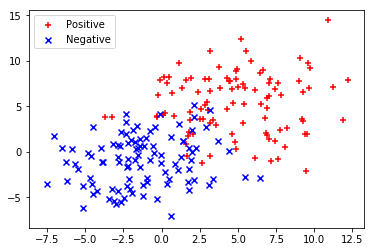

In [17]:
import numpy as np
import matplotlib.pyplot as plt

N,d = 100,2
x_positive = np.random.randn(N,d) * 3 + np.array([5, 5])
x_negative = np.random.randn(N,d) * 3 + np.array([-1, -1])
x = np.concatenate((x_positive, x_negative), axis=0)

plt.scatter(x_positive[:,0], x_positive[:,1], marker='+', c='r', label="Positive")
plt.scatter(x_negative[:,0], x_negative[:,1], marker='x', c='b', label="Negative")
plt.legend()
plt.show()

  $(y, t)$ の組み合わせによりそれぞれのデータを分類すると、以下の混合行列（Confusion matrix）が得られる。  

| y=1 | y=0
:-:|:-:|:-:
t=1 | TP | FN
t=0 | FP | TN
 
ここで、使用した用語は次の通り。  
　TP：真陽性（True positive）  
　TN：真陰性（True negative）  
　FP：偽陽性（False positive）  
　FN：偽陰性（False negative）  
  
これに基づき、以下のような評価指標がよく用いられる。

index | define | explanation
:-:|:-:|:--
正解率（Accuracy）| $\frac{TP + TN}{TP + FN + FP + TN}$ | 予測結果全体と正解データとの一致度
適合率（Precision）| $\frac{TP}{TP + FP}$ | Positiveと予測した中で、実際にPositiveであったものの割合
再現率（Recall）| $\frac{TP}{TP + FN}$ | Positiveと予測すべきデータの中で、実際にPositiveであると予測できた割合



---
#### 例題：スクリーニング検査
モデル評価手法検討のための例題として、医療機関において患者にある検査Aを実施して  
患者を疾患群または非疾患群（健常者群）に分類することを考える。  
  
この検査Aは患者からある入力 $x$ を受けて１つの検査値 $v$ を求め、  
それにより $x$ が属すると推定されるクラスの番号 $y$ を出力して患者が属する群を示すものであり、  
一種の２クラス分類器とみなすことができる。  
  
また、この検査Aはハイパーパラメータとしてカットオフ値 $\theta$ をもち、これは閾値として扱われ、  
　・検査値 $x$ がカットオフ値 $\theta$ 以上であるとき陽性 ( $y=1$ )  
　・検査値 $x$ がカットオフ値 $\theta$ 以下のとき陰性 ( $y=0$ )    
として診断するものと設定する。    
    
このとき、疾患を有するなら $t=1$ 、そうでないとき $t=0$ とすると、混合行列は次のように表せる。  
（先ほどの例とは予測y,正解tの軸が入れ替わっているので注意）  
  
|疾患群 (t=1)|非疾患群 (t=0)
--:|:-:|:-:
検査：陽性 (y=1)|TP|FP
検査：陰性 (y=0)|FN|TN
  
また、評価指標として以下のような値がよく用いられる。

index | define | explanation
:-:|:-:|:--
感度（sensitivity）| $\frac{TP}{TP + FN}$ | 疾患群のうち陽性として正しく検出できた割合。再現率に同じ。
特異度（specificity）| $\frac{TN}{FP + TN}$  | 非疾患群のうち陰性として正しく除外できた割合。
陽性反応的中度（Positive predictive value）| $\frac{TP}{TP + FP}$ | 検査陽性群のうち実際に疾患群である割合。適合率に同じ。


さて、疾患群、非疾患群のそれぞれにおいて検査値分布が分かっており、  
その概形は下図のようになっているとする。

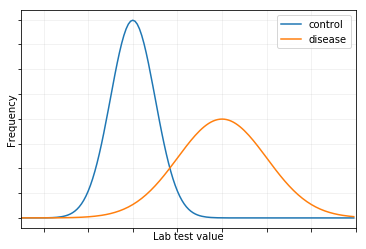

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def normdist(x, mu, sigma):
    return (1./(np.sqrt(2 * np.pi) * sigma)) * np.exp(( -1 * (x-mu)**2 )/(2 * sigma**2 ))

x = np.arange(-10,10,.1)
plt.plot(x, normdist(x, 0, 1), label="control")
plt.plot(x, normdist(x, 4, 2), label="disease")
plt.xlim(-5,10)
plt.ylabel("Frequency")
plt.xlabel("Lab test value")
plt.tick_params(labelbottom='off', labelleft='off')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

この状況において、カットオフ値 $\theta$ を動かして検査Aの"改善"を試みると、  
  
カットオフ値 $\theta$ を下げるとき  
　・TPが増えFNが減る、すなわちより多くの疾患群を検出できるが  
　・TNが減りFPが増える、すなわち非疾患群をより多く誤検出してしまう。  
　-> 感度上昇、特異度低下  

一方で、カットオフ値 $\theta$ を上げるとき  
　・TNが増えFPが減る、すなわち非疾患群の誤検出を減らせるが  
　・TPが減りFNが増える、すなわちより多くの疾患群を見逃してしまう。  
　-> 感度低下、特異度上昇  
   
となり、感度と特異度はトレードオフの関係にあり、単純な"改善"はできないことが分かる。  
  
両群の検査値分布とカットオフ値 $\theta$ の関係は下図の通り。  
　（ただし、見やすさのため疾患群については上下反転している）  

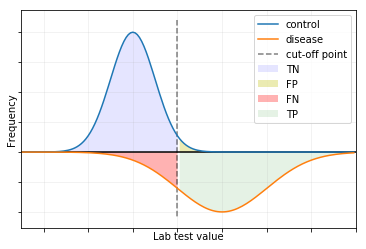

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def normdist(x, mu, sigma):
    return (1./(np.sqrt(2 * np.pi) * sigma)) * np.exp(( -1 * (x-mu)**2 )/(2 * sigma**2 ))

theta = 2
mu_n, sigma_n, mu_p, sigma_p = 0, 1, 4, 2
xmin, xmax = -10, 10

x = np.arange(xmin, xmax, .1)
plt.plot(x, normdist(x, mu_n, sigma_n), label="control")
plt.plot(x, -1*normdist(x, mu_p, sigma_p), label="disease")
plt.hlines([0], xmin, xmax)
plt.vlines([theta], np.max(normdist(x, mu_n, sigma_n))*1.1, np.min(-normdist(x, mu_p, sigma_p))*1.1, 
           linestyles='dashed', alpha=0.5, label='cut-off point')
plt.fill_between(x, normdist(x, mu_n, sigma_n), 0, where=x<theta, facecolor='b', alpha=0.1, label="TN")
plt.fill_between(x, normdist(x, mu_n, sigma_n), 0, where=x>=theta, facecolor='y', alpha=0.3, label="FP")
plt.fill_between(x, -normdist(x, mu_p, sigma_p), 0, where=x<theta, facecolor='r', alpha=0.3, label="FN")
plt.fill_between(x, -normdist(x, mu_p, sigma_p), 0, where=x>=theta, facecolor='g', alpha=0.1, label="TP")
plt.xlim(-5,10)
plt.ylabel("Frequency")
plt.xlabel("Lab test value")
plt.tick_params(labelbottom='off', labelleft='off')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

さて、感度と特異度はトレードオフの関係にあるが、  
カットオフ値によらずモデルの性能を評価するために使われるのがROC曲線のAUCである。  
  
ROC曲線（Receiver Operating Characteristic curve）は医療に限ったものではないが、  
医療の文脈では横軸に偽陽性率＝（1 - 特異度）、縦軸に感度をとり、  
カットオフ値を変化させた場合の（1-特異度, 感度）の動きをプロットした際に得られる曲線をいう。  
  
検査が疾患を有する確率について何の情報も与えないとき、ROC曲線は(0,0)と(1,1)を結ぶ直線に等しく、  
与える情報が大きいほど、ROC曲線は左上に向かって膨らんでいく。  
  
AUC (Area Under the Curve)はROC曲線下の面積であり  
AUCの大きさをカットオフ値に依存しない性能の指標とみなすことができる。  
  

下図にカットオフ値とROC曲線の関係を示す。  
（注：github上では表示されません。ご自身の環境でお試しください）  

　（参考：[【統計学】ROC曲線とは何か、アニメーションで理解する。](https://qiita.com/kenmatsu4/items/550b38f4fa31e9af6f4f)）  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact

mu_n, sigma_n = 0, 1
mu_p, sigma_p = 4, 2
xmin, xmax = -10, 10
theta_min, theta_max = xmin, xmax


@interact(theta=(theta_min, theta_max, .1))
def roc_plot(theta):
    x = np.arange(xmin, xmax, .1)
    xth = np.arange(theta_min, theta_max, .1)
    TN = norm.cdf(x=xth, loc=mu_n, scale=sigma_n)
    FN = norm.cdf(x=xth, loc=mu_p, scale=sigma_p)
    FP = 1 - TN
    TP = 1 - FN
    Sensitivity = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

    ax1.plot(x, norm.pdf(x=x, loc=mu_n, scale=sigma_n), label="control")
    ax1.plot(x, -1*norm.pdf(x=x, loc=mu_p, scale=sigma_p), label="disease")
    ax1.hlines([0], xmin, xmax)
    ax1.set_xlim(-5,10)
    ax1.set_ylabel("Frequency")
    ax1.set_xlabel("Lab test value")
    ax1.tick_params(labelbottom='off', labelleft='off')
    ax1.grid(alpha=0.2)
    ax1.vlines([theta], np.max(norm.pdf(x, mu_n, sigma_n))*1.1, np.min(-norm.pdf(x, mu_p, sigma_p))*1.1, 
           linestyles='dashed', alpha=0.5, label='cut-off point')
    ax1.fill_between(x, norm.pdf(x, mu_n, sigma_n), 0, where=x<theta, facecolor='b', alpha=0.1, label="TN")
    ax1.fill_between(x, norm.pdf(x, mu_n, sigma_n), 0, where=x>=theta, facecolor='y', alpha=0.3, label="FP")
    ax1.fill_between(x, -norm.pdf(x, mu_p, sigma_p), 0, where=x<theta, facecolor='r', alpha=0.3, label="FN")
    ax1.fill_between(x, -norm.pdf(x, mu_p, sigma_p), 0, where=x>=theta, facecolor='g', alpha=0.1, label="TP")
    ax1.legend()
    
    ax2.scatter(1-norm.cdf(x=theta, loc=mu_n, scale=sigma_n), 1-norm.cdf(x=theta, loc=mu_p, scale=sigma_p),
                label='(FPR,Sensitivity | theta)', facecolor='r')
    ax2.plot(FPR, Sensitivity)
    ax2.plot(FPR, FPR, color='black')
    ax2.fill_between(FPR, Sensitivity, 0, facecolor='b', alpha=0.1, label='AUC')
    ax2.set_ylabel("1 - Specificity")
    ax2.set_xlabel("Sensitivity")
    ax2.set_xlim=(np.min(FPR)-.1, np.max(FPR)+.1)
    ax2.set_ylim=(np.min(Sensitivity)-.1, np.max(Sensitivity)+.1)
    ax2.legend(bbox_to_anchor=(1,0.2))
    ax2.set_title("ROC curve")

    plt.tight_layout()
    plt.show()


#### 簡単な実験による予測評価


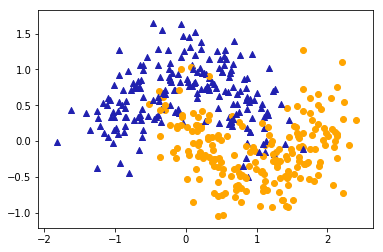

In [1]:
# datasets for toy problem
from sklearn import datasets
import matplotlib.pyplot as plt

N = 400
X, Y = datasets.make_moons(N, noise=0.3)

for i in range(len(X)):
    (marker, color) = ('o', 'orange') if Y[i] == 1 else ('^', '#2020B0')
    plt.scatter(X[i,0], X[i,1], marker=marker, color=color)
plt.show()

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Y = Y.reshape(N,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

num_hidden=2

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.truncated_normal([2,num_hidden]))
b1 = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.truncated_normal([num_hidden, 1]))
b2 = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, W2) + b2)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1-t) * tf.log(1-y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

batch_size = 20
n_batches = N // batch_size

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(500):
    X_, Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })
        
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test
})
print('accuracy: {}'.format(accuracy_rate))

accuracy: 0.800000011920929


隠れ層の次元数が２の場合の分類結果は下の通り。

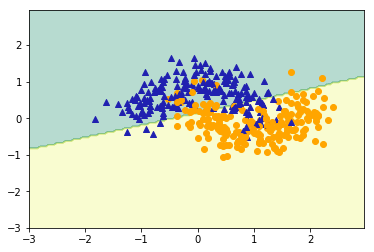

In [5]:
import numpy as np

def predict_m(feed_x):
    class_n = tf.greater(y, 0.5).eval(session=sess, feed_dict={
        x: feed_x,
    })
    return class_n

s = np.arange(-3,3,.05)
t = np.arange(-3,3,.05)
S, T = np.meshgrid(s, t)
Z1 = np.dstack((S,T))
Z2 = predict_m(np.array(Z1).reshape(-1,2))

plt.contourf(S, T, Z2.reshape(len(s),len(t)), alpha=.3, cmap="summer")
for i in range(len(X)):
    (marker, color) = ('o', 'orange') if Y[i] == 1 else ('^', '#2020B0')
    plt.scatter(X[i,0], X[i,1], marker=marker, color=color)
plt.show()

隠れ層を３層とする。

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Y = Y.reshape(N,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

num_hidden=3

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.truncated_normal([2,num_hidden]))
b1 = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.truncated_normal([num_hidden, 1]))
b2 = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, W2) + b2)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1-t) * tf.log(1-y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

batch_size = 20
n_batches = N // batch_size

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(500):
    X_, Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })
        
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test
})
print('accuracy: {}'.format(accuracy_rate))

accuracy: 0.925000011920929


隠れ層の次元数が3の場合の分類結果は次の通り。

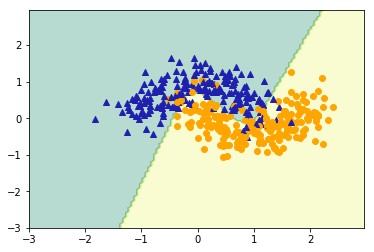

In [9]:
import numpy as np

def predict_m(feed_x):
    class_n = tf.greater(y, 0.5).eval(session=sess, feed_dict={
        x: feed_x,
    })
    return class_n

s = np.arange(-3,3,.05)
t = np.arange(-3,3,.05)
S, T = np.meshgrid(s, t)
Z1 = np.dstack((S,T))
Z2 = predict_m(np.array(Z1).reshape(-1,2))

plt.contourf(S, T, Z2.reshape(len(s),len(t)), alpha=.3, cmap="summer")
for i in range(len(X)):
    (marker, color) = ('o', 'orange') if Y[i] == 1 else ('^', '#2020B0')
    plt.scatter(X[i,0], X[i,1], marker=marker, color=color)
plt.show()

#### Kerasでの実装

In [54]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

N = 400
X, Y = datasets.make_moons(N, noise=0.3)
Y = Y.reshape(N,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

model = Sequential()
model.add(Dense(3, input_dim=2))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])

model.fit(X, Y, epochs=500, batch_size=20, verbose=0)
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

 32/120 [=======>......................] - ETA: 0s[0.38965831796328226, 0.8333333293596904]


11200/14400 [======================>.......] - ETA: 0s

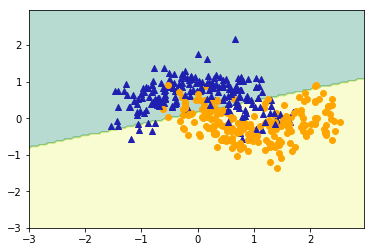

In [55]:
import matplotlib.pyplot as plt

s = np.arange(-3,3,.05)
t = np.arange(-3,3,.05)
S, T = np.meshgrid(s, t)
Z1 = np.dstack((S,T))
Z2 = model.predict_classes(np.array(Z1).reshape(-1,2))

plt.contourf(S, T, Z2.reshape(len(s),len(t)), alpha=.3, cmap="summer")
for i in range(len(X)):
    (marker, color) = ('o', 'orange') if Y[i] == 1 else ('^', '#2020B0')
    plt.scatter(X[i,0], X[i,1], marker=marker, color=color)
plt.show()

fuctional APIで書き直す

In [61]:
import numpy as np
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD

# datasetは同じものを使う

inputs = Input(shape=(2,))
x = Dense(3, activation='sigmoid')(inputs)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=SGD(lr=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          epochs=500,
          batch_size=20,
          verbose=0)

loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

 32/120 [=======>......................] - ETA: 0s[0.40238283276557923, 0.84166667064030964]


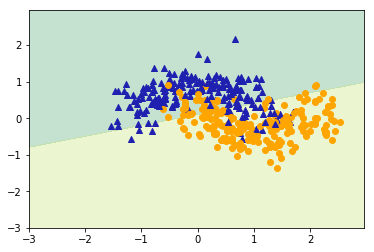

In [62]:
import matplotlib.pyplot as plt

s = np.arange(-3,3,.05)
t = np.arange(-3,3,.05)
S, T = np.meshgrid(s, t)
Z1 = np.dstack((S,T))
Z2 = model.predict(np.array(Z1).reshape(-1,2))

plt.contourf(S, T, Z2.reshape(len(s),len(t)), levels=[0,0.5,1], alpha=.3, cmap="summer")
for i in range(len(X)):
    (marker, color) = ('o', 'orange') if Y[i] == 1 else ('^', '#2020B0')
    plt.scatter(X[i,0], X[i,1], marker=marker, color=color)
plt.show()

---
３章はここまで。  
モデルの改善は本章の内容でないため、次章以降で行う  